<a href="https://colab.research.google.com/github/tas-anne/Numerical-Method-LabTask/blob/main/Tasfia_Tasneem_Annesha_190041220_Math_4642_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3 : Newton's Divided Difference Interpolation**<br>

Interpolation is the process of estimating unknown data that lies within the range of some known data. The **Newton's Divided Difference Interpolation** is one of the methods of performing this task. In order to interpolate unknown data, one needs to define a model that would fit the known data and based on that model, one would obtain the unknown data. This model would basically be a function that tries to satisfy the known data points. There can be various types of functions that may satisfy the same given data points, but for interpolation, we usually choose **polynomials** as interpolating functions due to the fact that polynomials are generalized and are very easy to evaluate, differentiate and integrate.

In today's lab, we will be implementing the Newton's Divided Difference Interpolation in python. To test our implementation, we will be using the same data that we used during our class lectures. Run the following cell to load the known data points:


In [ ]:
t = [0, 10, 15, 20, 22.5, 30]
v = [0, 227.04, 362.78, 517.35, 602.97, 901.67]

##Task 1
Design a utility function that will be called in the Newton's Divided Difference function. The purpose of this function will be to find the n+1 closest points to the unknown value t_new where we want to interpolate the data, where n is the order of the interpolating polynomial. The function to be implemented is as follows:

In [ ]:
def NearestPoints(t, v, n, t_new):
  #Write your implementation here
  diff = []
  for i in range(len(t)):
    diff.append([abs(t_new-t[i]),t[i],v[i]])
  diff = sorted(diff)
  t_nearest = []
  v_nearest = []
  for i in range(n+1):
    t_nearest.append(diff[i][1])
    v_nearest.append(diff[i][2])
  return t_nearest, v_nearest


The above function is supposed to return two vectors, say t_nearest and v_nearest consisting of n+1 elements each. For testing the working of the function, we can print the data and see what we are getting. Run the following cell to check this:

In [ ]:
n = 1
t_new = 16

t_nearest, v_nearest = NearestPoints(t, v, n, t_new)
print(t_nearest)
print(v_nearest)

[15, 20]
[362.78, 517.35]


##Task 2
Now your task is to design a generalized function that takes the given data as parameters as well as the order (n) of the polynomial and uses the Newton's Divided Difference Polynomial to interpolate the uknown data at t_new. The following cell contains the function to be implemented:

In [ ]:
def b_func(l, r, v, t, b):
    if r == l:
        b[l][r] = v[l]
    elif b[l][r] == None:
        b[l][r] = (b_func(l, r + 1, v, t, b) - b_func(l - 1, r, v, t, b)) / (t[l] - t[r])
    return b[l][r]

def NDD(t, v, n, t_new):
    
    b = [[None] * (n + 1) for _ in range(n + 1)]
    b_func(n, 0, v, t, b)
    ans, c = b[0][0], 1
    
    for i in range(1, n + 1):
        c *= (t_new - t[i - 1])
        ans += b[i][0] * c
    return ans

print(NDD(t_nearest, v_nearest, n, t_new))


393.69399999999996


Note that the above function will at first need to find a number of closest points to the unknown data (t_new), and this number will vary depending on the order (n) of the polynomial that we want to use as the interpolating function. So you will have to call the function you implemented in Task 1 inside this function.

##Task 3
Now, test the function using different order of polynomials, setting n = 1, 2, 3 and so on and print the absolute relative approximate error at each step. Also store the time needed for executing the NDD function for the different orders of the polynomial. Finally, generate a plot of **order vs error** and **order vs time** curves in the same graph.

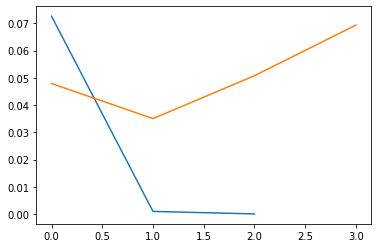

In [ ]:
#Write your code here for finding the relative approximate errors and time elapsed for different orders of the polynomial
import time

errors = []
time_elapsed = []

prev_ans = None

for i in range(1, 5):
    start = time.time()
    ans_new = NDD(t, v, i, t_new)
    end = time.time()
    time_elapsed.append((end - start)*3000)
    if prev_ans:
        errors.append(abs(ans_new - prev_ans)/ans_new)
    prev_ans = ans_new
    
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, len(errors))
plt.plot(iters, errors)


iters = np.arange(0, len(time_elapsed))
plt.plot(iters, time_elapsed)
plt.show()

